In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

In [12]:
path = './IMDB_Dataset.csv'
df = pd.read_csv(path)

df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [13]:
# Basic information about the dataset
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   650 non-null    object 
 1   Released_Year  650 non-null    int64  
 2   Certificate    580 non-null    object 
 3   Runtime        650 non-null    object 
 4   Genre          650 non-null    object 
 5   IMDB_Rating    650 non-null    float64
 6   Overview       650 non-null    object 
 7   Meta_score     516 non-null    float64
 8   Director       650 non-null    object 
 9   Star           650 non-null    object 
 10  No_of_Votes    650 non-null    int64  
 11  Gross          534 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB
Dataset contains 650 rows and 12 columns.


In [14]:
df['Gross'] = df['Gross'].str.replace(',', '')
print(df['Gross'].head(1))

df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


In [15]:
df.drop(columns=['Certificate'], inplace=True)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


               Missing Values  Percentage
Series_Title                0    0.000000
Released_Year               0    0.000000
Runtime                     0    0.000000
Genre                       0    0.000000
IMDB_Rating                 0    0.000000
Overview                    0    0.000000
Meta_score                134   20.615385
Director                    0    0.000000
Star                        0    0.000000
No_of_Votes                 0    0.000000
Gross                       0    0.000000


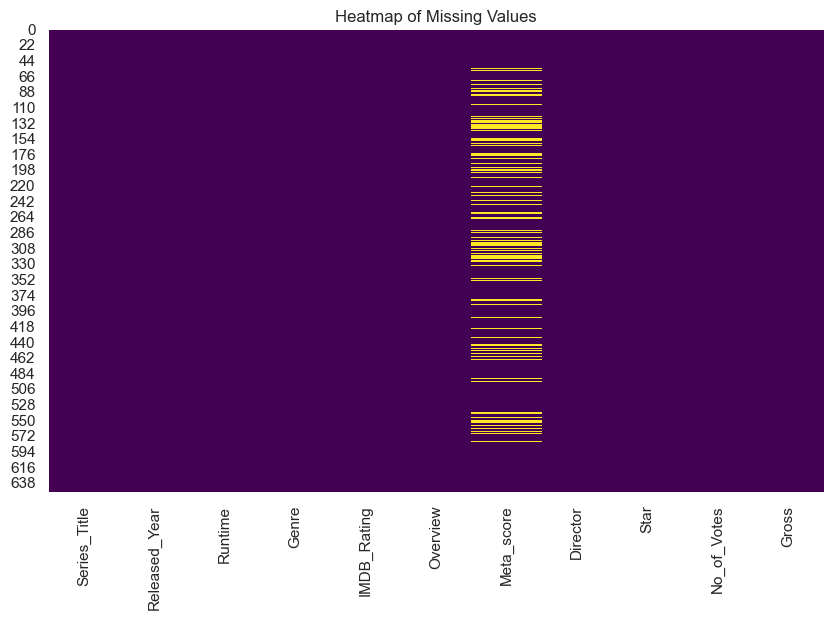

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [17]:
# Check for infinite values in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    inf_count = df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values.")


In [18]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [19]:
# Fill missing values for numerical columns with the mean (example)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

               Missing Values  Percentage
Series_Title                0         0.0
Released_Year               0         0.0
Runtime                     0         0.0
Genre                       0         0.0
IMDB_Rating                 0         0.0
Overview                    0         0.0
Meta_score                  0         0.0
Director                    0         0.0
Star                        0         0.0
No_of_Votes                 0         0.0
Gross                       0         0.0


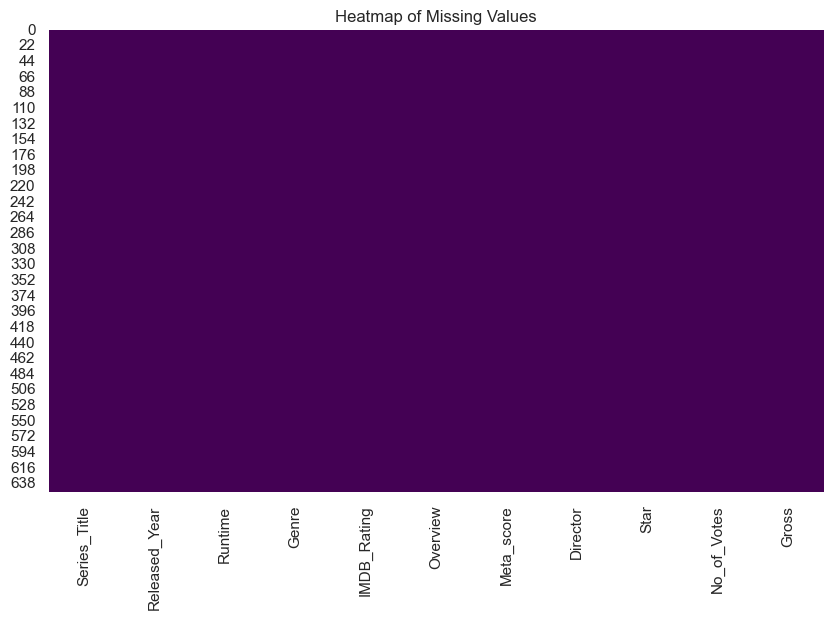

In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [21]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [97]:
# Summary statistics of numerical columns
df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,650.000000,650.000000,650.000000,6.500000e+02,6.500000e+02
mean,1990.650769,8.091692,80.197674,3.225202e+05,5.777916e+07
std,24.836033,0.236549,10.619040,3.768351e+05,1.109815e+08
min,1920.000000,7.800000,33.000000,2.508800e+04,0.000000e+00
25%,1973.000000,7.900000,75.000000,5.734550e+04,2.111558e+05
50%,2000.000000,8.000000,80.197674,1.552450e+05,6.738746e+06
75%,2010.750000,8.200000,87.000000,4.658788e+05,6.072450e+07
max,2020.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


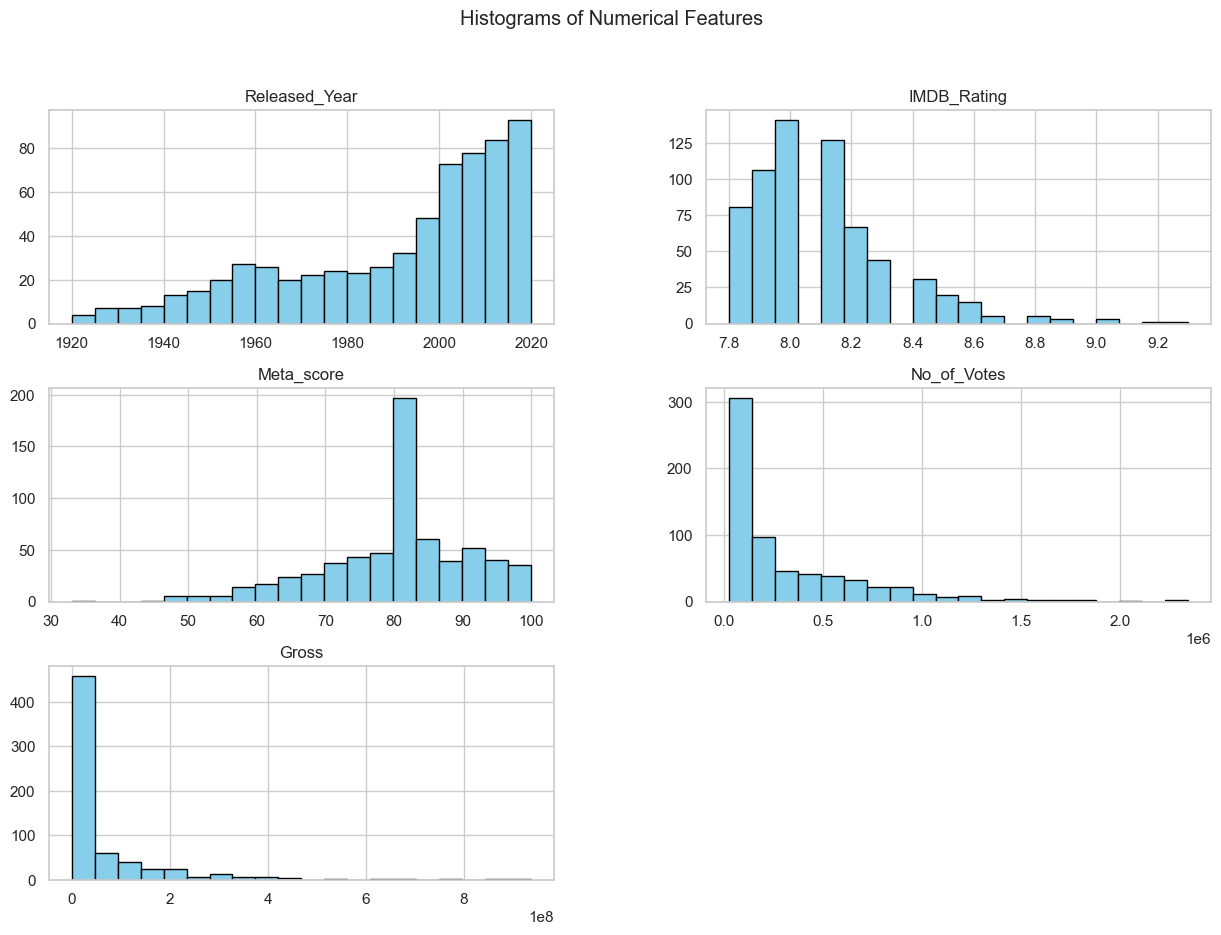

In [24]:
# Plot histograms for numerical features
df.select_dtypes(include=[np.number]).hist(figsize=(15, 10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

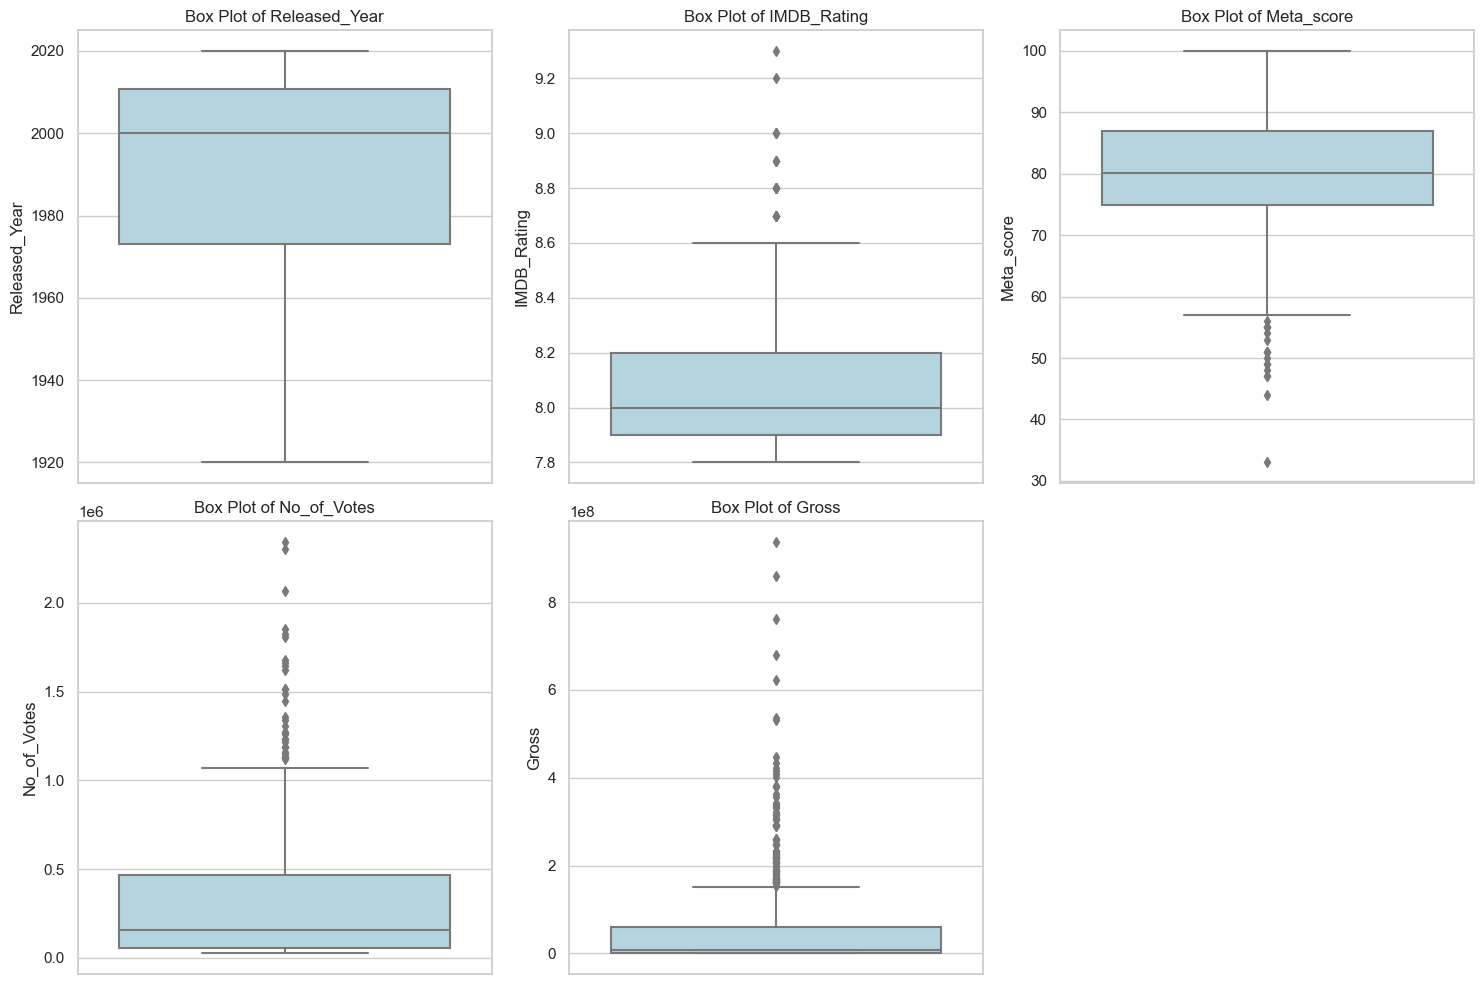

In [99]:
# Box plots to visualize outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color="lightblue")
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


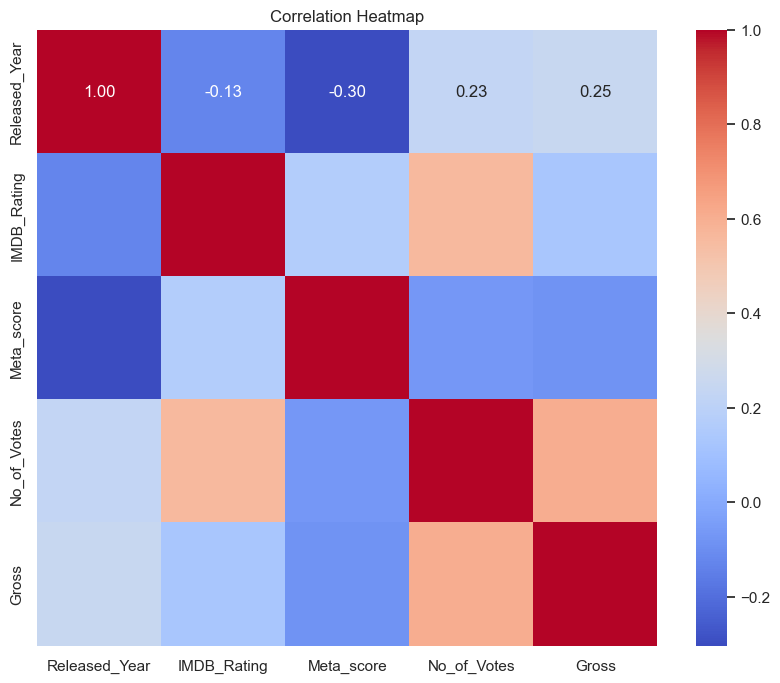

In [30]:
# Compute correlation matrix
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

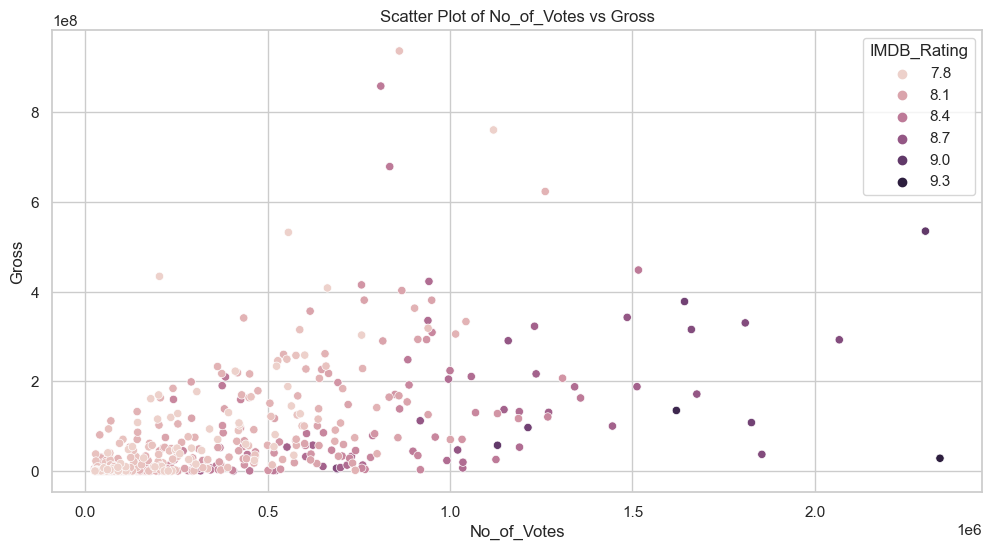

In [28]:
# Scatter plots for highly correlated pairs (example)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=numerical_cols[3], y=numerical_cols[4], hue=df[numerical_cols[1]])
plt.title(f"Scatter Plot of {numerical_cols[3]} vs {numerical_cols[4]}")
plt.show()


C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

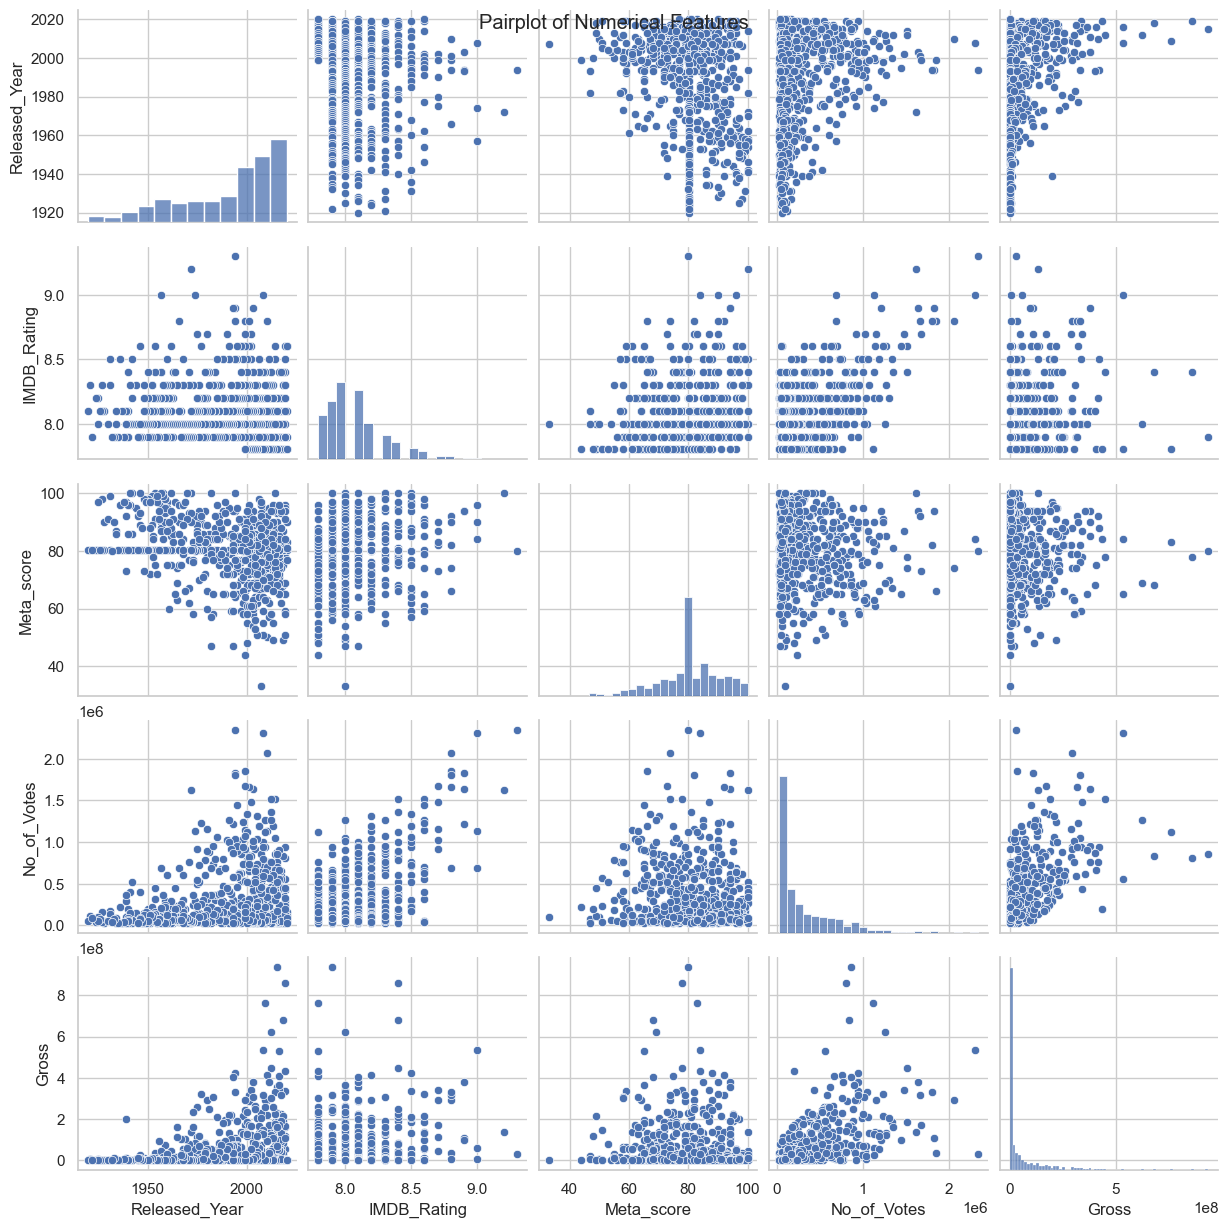

In [31]:
# Pairplot for numerical features
sns.pairplot(numeric_df)
plt.suptitle("Pairplot of Numerical Features")
plt.show()

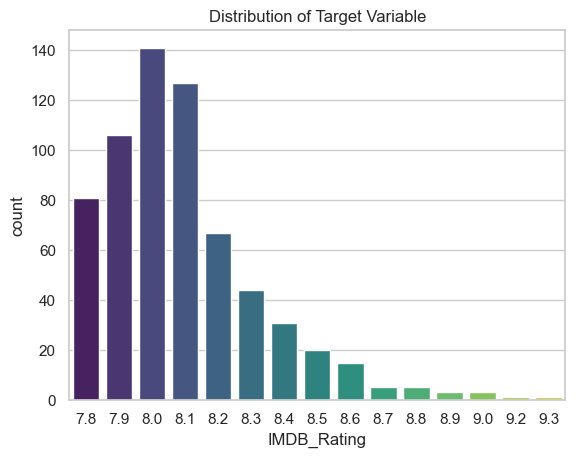

In [34]:
# Target variable distribution
if 'IMDB_Rating' in df.columns:
    sns.countplot(data=df, x='IMDB_Rating', palette='viridis')
    plt.title("Distribution of Target Variable")
    plt.show()
